# Importing Modules

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

# Loading Data

In [ ]:
df = pd.read_csv('housing.csv')
df.head()

FileNotFoundError: ignored

# Data Exploration

In [ ]:
df.shape

(506, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


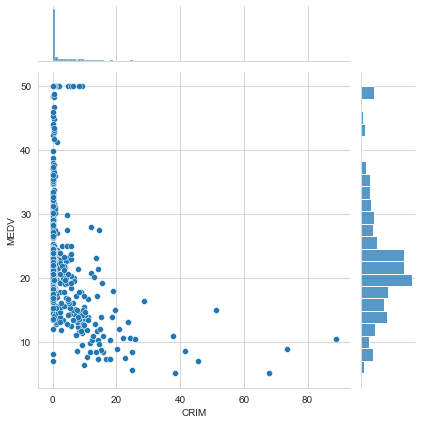

In [ ]:
# Relationship between Crime and MEDV
sns.set_style('whitegrid')
sns.jointplot(x = 'CRIM', y = 'MEDV', data = df)
plt.show()

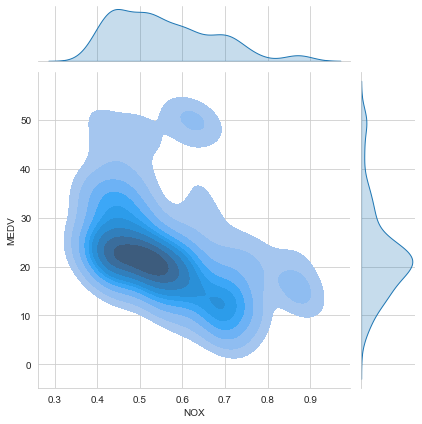

In [ ]:
sns.jointplot(x = 'NOX', y = 'MEDV', data = df, kind = 'kde', fill = True)
# homes at or above the median home value have the highest nitric oxide concentrations.

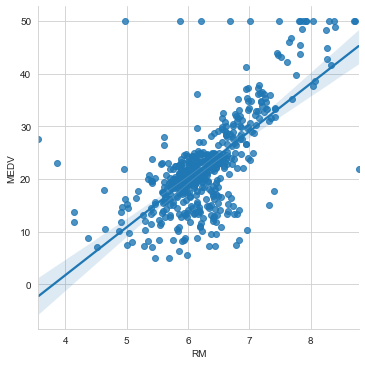

In [ ]:
sns.lmplot(x = 'RM', y = 'MEDV', data = df)
plt.show()

More room means more price.

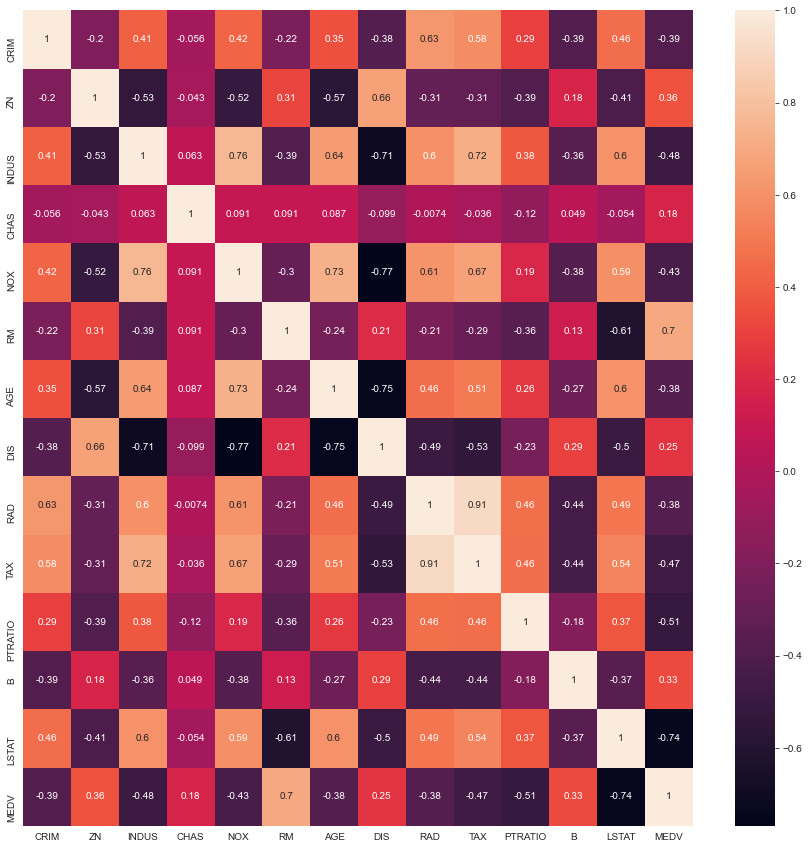

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot= True)
plt.show()


Some interesting correlations here
- There is highest positive correlation (0.91)  bewteen property tax (TAX) and accessibility to radial highways
- The greatest negative correlation lies between nitirc oxide concentration (NOX) and (DIS)

# Data Preparation

In [ ]:
# Splitting data into input and output
X = df.drop('MEDV', axis = 1)
y = df['MEDV']

NameError: ignored

In [ ]:
# Splitting data into train and test part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Tuning Parameters of Models

### 1) Tuning Decision Tree

In [ ]:
params = {
    "criterion": ["mse", "friedman_mse", "mae"],
    "splitter": ["best", "random"],
    "max_depth": [None, 2, 5, 8],
    "min_samples_split": [2, 4, 7]
}

grid_dtr = GridSearchCV(DecisionTreeRegressor(), params)
grid_dtr.fit(X_train, y_train)
grid_dtr.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'min_samples_split': 4,
 'splitter': 'best'}

### 2) Tuning Random Forest

In [ ]:
params = {
    "n_estimators": [50, 100, 200],
    "criterion": ["mse", "friedman_mse", "mae"],
    "max_depth": [None, 2, 5, 8]
}

grid_dtr = GridSearchCV(RandomForestRegressor(), params)
grid_dtr.fit(X_train, y_train)
grid_dtr.best_params_

{'criterion': 'mse', 'max_depth': 8, 'n_estimators': 100}

# Building Final Tunned Models

In [ ]:
# check the performance on diffrent regressor
models = []
models.append(('Decision Tree', DecisionTreeRegressor(criterion="friedman_mse", splitter='best', max_depth=8, min_samples_split=2)))
models.append(('Random Forest', RandomForestRegressor(criterion="mse", max_depth=None, n_estimators=50)))

train_l = []
test_l = []
mae_l = []
rmse_l = []
r2_l = []

import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()

    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)

    # Scores of model
    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)

    train_l.append(train)
    test_l.append(test)

    # predict values
    predictions = clf.predict(X_test)
    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_l.append(rmse)
    # MAE
    mae = mean_absolute_error(y_test,predictions)
    mae_l.append(mae)
    # R2 score
    r2 = r2_score(y_test,predictions)
    r2_l.append(r2)



    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Root mean squared error (RMSE) : ', rmse)
    print("-"*50)
    print('Mean absolute error (MAE) : ', mae)
    print("-"*50)
    print('R2 score : ', r2)
    print("-"*50)



    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()

+ ==================================================================================================== +
			1-For Decision Tree The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  4.425869957542217
--------------------------------------------------
Mean absolute error (MAE) :  3.152213375201125
--------------------------------------------------
R2 score :  0.8026567218422131
--------------------------------------------------
							-----------------------------------------------------------
							 Time for detection (Decision Tree) : 0.015 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For Random Forest The Performance result is: 
+ ==================================================================================================== 

In [ ]:
comp = pd.DataFrame({"Model": dict(models).keys(), "R2 Score": r2_l, "Training Score": train_l, "Testing Score": test_l, "MAE": mae_l, "RMSE": rmse_l}).sort_values("R2 Score",ascending=False)
comp

,Model,R2 Score,Training Score,Testing Score,MAE,RMSE
1,Random Forest,0.865090,0.981767,0.865090,2.664645,3.659396
0,Decision Tree,0.802657,0.978063,0.802657,3.152213,4.425870


From this we can see that Random Forest is performing better than the
Decision Tree.